In [9]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import Analysis_Without_IP

In [11]:
# why is decision boundary more nuanced when adding redundant categories

# make PCA graph, the axes are based on decision boundaries, think of a blobs in a 3d space, each blob represents a category
# compare PCA of base categories vs redundant categories

# PCA principle component analysis
# variance, when looking at chair, which angle of char shows the most of the chair, what angle is best to see the most of it, reducing object down to 2 dimensions to minimize the loss of reducing the dimension

## Flowers 10

C:\Users\antho\AppData\Local\Temp\ipykernel_5512\732172186.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_labels))


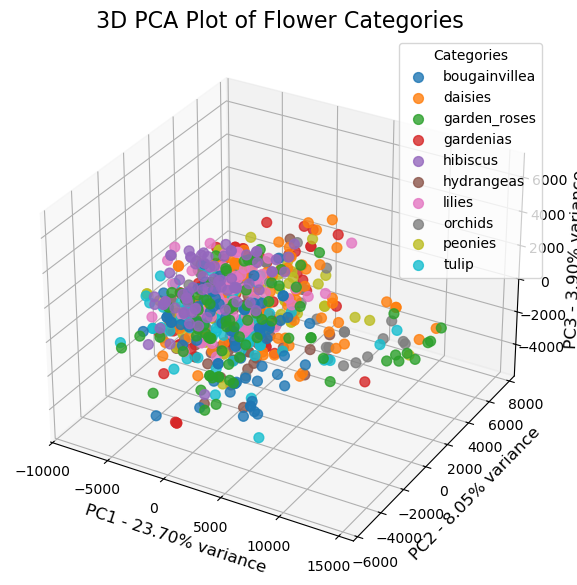

In [12]:

# Load the CSV
df = pd.read_csv("WithoutIP/flowers10/f10.csv")

# Extract file paths and labels
file_paths = df['file'].values
labels = df['label'].values

# Function to load and preprocess images (resize and flatten)
def load_images(file_paths, image_size=(64, 64)):
    images = []
    for path in file_paths:
        img = Image.open(path).resize(image_size).convert("RGB")  # Resize and convert to RGB
        images.append(np.array(img).flatten())  # Flatten the image into a vector
    return np.array(images)

# Load images and create a feature matrix
image_features = load_images(file_paths)

# Perform PCA
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(image_features)

# Plot 3D PCA
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Color-code points by label
unique_labels = np.unique(labels)
colors = plt.cm.get_cmap("tab10", len(unique_labels))

for i, label in enumerate(unique_labels):
    idx = labels == label
    ax.scatter(reduced_data[idx, 0], reduced_data[idx, 1], reduced_data[idx, 2],
               label=label, alpha=0.8, s=50, color=colors(i))

# Add axis labels and legend
ax.set_title("3D PCA Plot of Flower Categories", fontsize=16)
ax.set_xlabel(f"PC1 - {pca.explained_variance_ratio_[0]*100:.2f}% variance", fontsize=12)
ax.set_ylabel(f"PC2 - {pca.explained_variance_ratio_[1]*100:.2f}% variance", fontsize=12)
ax.set_zlabel(f"PC3 - {pca.explained_variance_ratio_[2]*100:.2f}% variance", fontsize=12)
ax.legend(title="Categories", loc="best", fontsize=10)
plt.show()


In [17]:
from Analysis_Without_IP import (fl140)

C:\Users\antho\AppData\Local\Temp\ipykernel_5512\2470062802.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_labels))


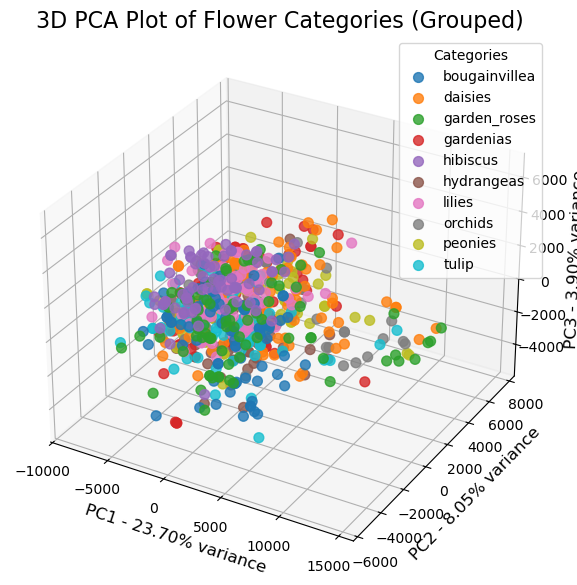

In [18]:
# Flatten the fl140 dictionary into a mapping
label_mapping = {}
for key, values in fl140.items():
    for value in values:
        label_mapping[value.lower()] = key  # Map all variations to the main key

# Apply the mapping to the labels
df['label'] = df['label'].str.lower().map(label_mapping).fillna(df['label'])  # Fallback to original if not in mapping

# Reload labels after mapping
labels = df['label'].values

# Perform PCA (as before)
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(image_features)

# Replot with grouped labels
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Unique categories after grouping
unique_labels = np.unique(labels)
colors = plt.cm.get_cmap("tab10", len(unique_labels))

for i, label in enumerate(unique_labels):
    idx = labels == label
    ax.scatter(reduced_data[idx, 0], reduced_data[idx, 1], reduced_data[idx, 2],
               label=label, alpha=0.8, s=50, color=colors(i))

# Add axis labels and legend
ax.set_title("3D PCA Plot of Flower Categories (Grouped)", fontsize=16)
ax.set_xlabel(f"PC1 - {pca.explained_variance_ratio_[0]*100:.2f}% variance", fontsize=12)
ax.set_ylabel(f"PC2 - {pca.explained_variance_ratio_[1]*100:.2f}% variance", fontsize=12)
ax.set_zlabel(f"PC3 - {pca.explained_variance_ratio_[2]*100:.2f}% variance", fontsize=12)
ax.legend(title="Categories", loc="best", fontsize=10)
plt.show()
